<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Students_score_by_year_and_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install kaggle

In [14]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
# Kaggle api
!kaggle datasets download fundal/sat-by-year-and-gender-1967-2001

Dataset URL: https://www.kaggle.com/datasets/fundal/sat-by-year-and-gender-1967-2001
License(s): CC0-1.0
  0% 0.00/799 [00:00<?, ?B/s]
100% 799/799 [00:00<00:00, 1.18MB/s]


In [16]:
!ls

kaggle.json  sample_data  sat-by-year-and-gender-1967-2001.zip


In [17]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/sat-by-year-and-gender-1967-2001.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [18]:
!ls

kaggle.json  sample_data  sat-by-year-and-gender-1967-2001.zip	SAT_by_Year_Gender_1967_2001.csv


**Importing the dependencies **

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [20]:
# Loading the csv file to a pandas dataframe
student_data = pd.read_csv("/content/SAT_by_Year_Gender_1967_2001.csv")

In [21]:
student_data.head()

,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages
0,1967,540,545,535,495,543,516,538,520,529
1,1968,541,543,533,497,543,516,537,520,528
2,1969,536,543,534,498,540,517,535,520,528
3,1970,536,538,531,493,537,512,534,516,524
4,1971,531,534,529,494,532,513,530,514,522


In [22]:
# Printing the size of the dataframe
student_data.shape

(35, 10)

In [23]:
# Getting some information about the dataframe
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        35 non-null     int64
 1   M_verbal    35 non-null     int64
 2   F_verbal    35 non-null     int64
 3   M_math      35 non-null     int64
 4   F_math      35 non-null     int64
 5   A_verbal    35 non-null     int64
 6   A_math      35 non-null     int64
 7   M_averages  35 non-null     int64
 8   F_averages  35 non-null     int64
 9   A_averages  35 non-null     int64
dtypes: int64(10)
memory usage: 2.9 KB


In [24]:
# Getting the statistical measures of the data
student_data.describe()

,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1984.000000,514.057143,508.371429,524.028571,485.057143,511.171429,503.685714,518.971429,496.742857,507.771429
std,10.246951,11.206466,15.262576,6.021949,8.653265,13.307419,7.722280,7.789456,10.592291,9.068646
min,1967.000000,501.000000,495.000000,515.000000,473.000000,499.000000,492.000000,510.000000,484.000000,498.000000
25%,1975.500000,507.000000,498.000000,520.000000,478.500000,504.000000,497.500000,513.500000,490.000000,501.000000
50%,1984.000000,509.000000,502.000000,523.000000,484.000000,505.000000,502.000000,516.000000,492.000000,505.000000
75%,1992.500000,515.000000,508.500000,529.500000,493.500000,510.500000,511.000000,520.500000,500.500000,510.000000
max,2001.000000,541.000000,545.000000,535.000000,498.000000,543.000000,517.000000,538.000000,520.000000,529.000000


In [29]:
# Getting some information using a correlation matrix
correlation = student_data[['M_verbal', 'F_verbal','M_math','F_math', 'A_verbal', 'A_math', 'M_averages', 'F_averages']].corr() #Double brackets are used when we want to select multiple columns
print(correlation)

            M_verbal  F_verbal    M_math    F_math  A_verbal    A_math  M_averages  F_averages
M_verbal    1.000000  0.972816  0.538659  0.444300  0.989994  0.559292    0.941077    0.883455
F_verbal    0.972816  1.000000  0.623890  0.540542  0.994958  0.648088    0.956263    0.941366
M_math      0.538659  0.623890  1.000000  0.957792  0.591574  0.984951    0.790055    0.836552
F_math      0.444300  0.540542  0.957792  1.000000  0.503081  0.983120    0.702547    0.791471
A_verbal    0.989994  0.994958  0.591574  0.503081  1.000000  0.614170    0.955400    0.922804
A_math      0.559292  0.648088  0.984951  0.983120  0.614170  1.000000    0.797820    0.863393
M_averages  0.941077  0.956263  0.790055  0.702547  0.955400  0.797820    1.000000    0.975213
F_averages  0.883455  0.941366  0.836552  0.791471  0.922804  0.863393    0.975213    1.000000


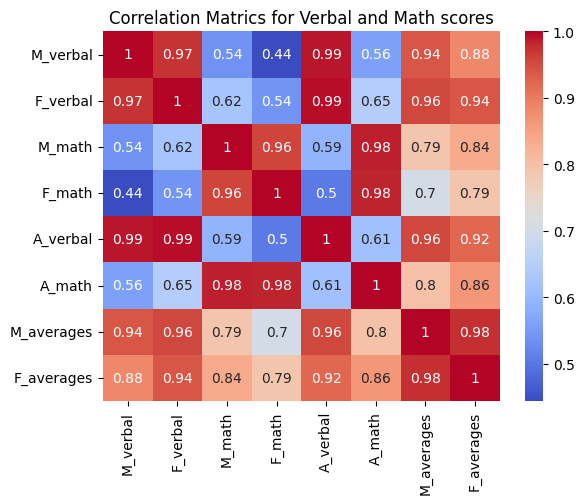

In [33]:
# Correlation with visual represntation
sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.title("Correlation Matrics for Verbal and Math scores")
plt.show()